In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import joblib
import warnings
warnings.filterwarnings('ignore')

#***Load Dataset:-***

In [43]:
df=pd.read_csv('/content/hypertension_dataset.csv')

In [44]:
df.head()

,Country,Age,BMI,Cholesterol,Systolic_BP,Diastolic_BP,Smoking_Status,Alcohol_Intake,Physical_Activity_Level,Family_History,...,Sleep_Duration,Heart_Rate,LDL,HDL,Triglycerides,Glucose,Gender,Education_Level,Employment_Status,Hypertension
0,UK,58,29.5,230,160,79,Never,27.9,Low,Yes,...,6.1,80,100,75,72,179,Female,Primary,Unemployed,High
1,Spain,34,36.2,201,120,84,Never,27.5,High,Yes,...,9.8,56,77,47,90,113,Male,Secondary,Unemployed,High
2,Indonesia,73,18.2,173,156,60,Current,1.8,High,Yes,...,5.2,75,162,56,81,101,Male,Primary,Employed,Low
3,Canada,60,20.3,183,122,94,Never,11.6,Moderate,Yes,...,7.5,71,164,93,94,199,Female,Secondary,Retired,High
4,France,73,21.8,296,91,97,Never,29.1,Moderate,Yes,...,5.0,52,108,74,226,157,Female,Primary,Employed,High


In [8]:
#shape
df.shape

(174982, 23)

#***EDA(Explotary Data Analysis):-***

In [9]:
#information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174982 entries, 0 to 174981
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Country                  174982 non-null  object 
 1   Age                      174982 non-null  int64  
 2   BMI                      174982 non-null  float64
 3   Cholesterol              174982 non-null  int64  
 4   Systolic_BP              174982 non-null  int64  
 5   Diastolic_BP             174982 non-null  int64  
 6   Smoking_Status           174982 non-null  object 
 7   Alcohol_Intake           174982 non-null  float64
 8   Physical_Activity_Level  174982 non-null  object 
 9   Family_History           174982 non-null  object 
 10  Diabetes                 174982 non-null  object 
 11  Stress_Level             174982 non-null  int64  
 12  Salt_Intake              174982 non-null  float64
 13  Sleep_Duration           174982 non-null  float64
 14  Hear

In [10]:
#dataset describe
df.describe()

,Age,BMI,Cholesterol,Systolic_BP,Diastolic_BP,Alcohol_Intake,Stress_Level,Salt_Intake,Sleep_Duration,Heart_Rate,LDL,HDL,Triglycerides,Glucose
count,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000
mean,53.493319,27.494672,224.539335,134.505229,89.450315,14.991069,5.013041,8.482757,6.996468,74.495085,129.528271,64.573105,149.569836,134.488187
std,20.786353,7.213866,43.361589,26.019268,17.310789,8.652624,2.582341,3.750074,1.730731,14.438573,34.635795,20.190666,57.765006,37.526882
min,18.000000,15.000000,150.000000,90.000000,60.000000,0.000000,1.000000,2.000000,4.000000,50.000000,70.000000,30.000000,50.000000,70.000000
25%,36.000000,21.200000,187.000000,112.000000,74.000000,7.500000,3.000000,5.200000,5.500000,62.000000,100.000000,47.000000,100.000000,102.000000
50%,54.000000,27.500000,225.000000,135.000000,89.000000,15.000000,5.000000,8.500000,7.000000,74.000000,130.000000,65.000000,150.000000,134.000000
75%,71.000000,33.700000,262.000000,157.000000,104.000000,22.500000,7.000000,11.700000,8.500000,87.000000,160.000000,82.000000,200.000000,167.000000
max,89.000000,40.000000,299.000000,179.000000,119.000000,30.000000,9.000000,15.000000,10.000000,99.000000,189.000000,99.000000,249.000000,199.000000


In [11]:
#Check the missing values
df.isnull().sum()

,0
Country,0
Age,0
BMI,0
Cholesterol,0
Systolic_BP,0
Diastolic_BP,0
Smoking_Status,0
Alcohol_Intake,0
Physical_Activity_Level,0
Family_History,0


In [12]:
#Check the duplicated rows
df.duplicated().sum()

0

In [13]:
#categorical column list
cat_col=df.select_dtypes(include='object').columns
cat_col

Index(['Country', 'Smoking_Status', 'Physical_Activity_Level',
       'Family_History', 'Diabetes', 'Gender', 'Education_Level',
       'Employment_Status', 'Hypertension'],
      dtype='object')

In [14]:
#numerical column list
num_col=df.select_dtypes(exclude='object').columns
num_col

Index(['Age', 'BMI', 'Cholesterol', 'Systolic_BP', 'Diastolic_BP',
       'Alcohol_Intake', 'Stress_Level', 'Salt_Intake', 'Sleep_Duration',
       'Heart_Rate', 'LDL', 'HDL', 'Triglycerides', 'Glucose'],
      dtype='object')

#***Data Visualization:-***

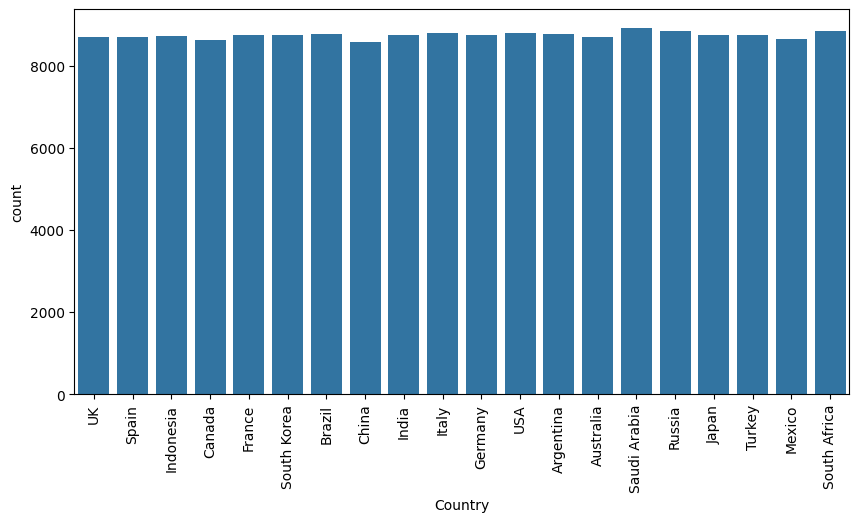

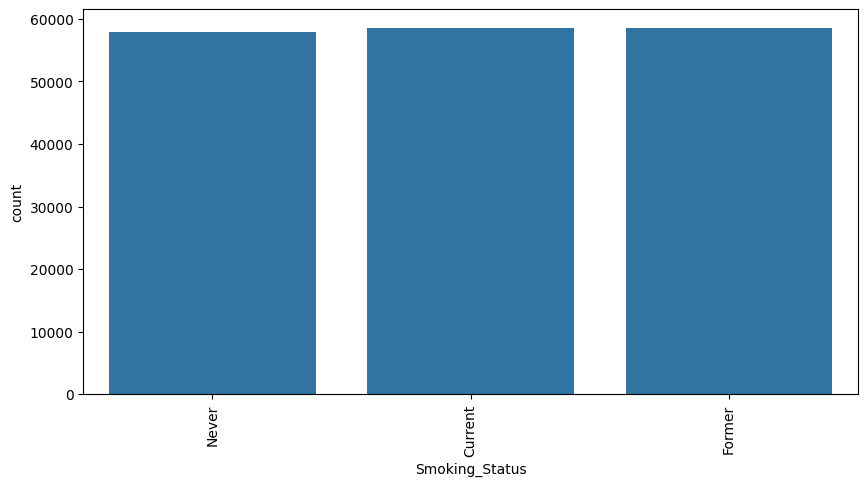

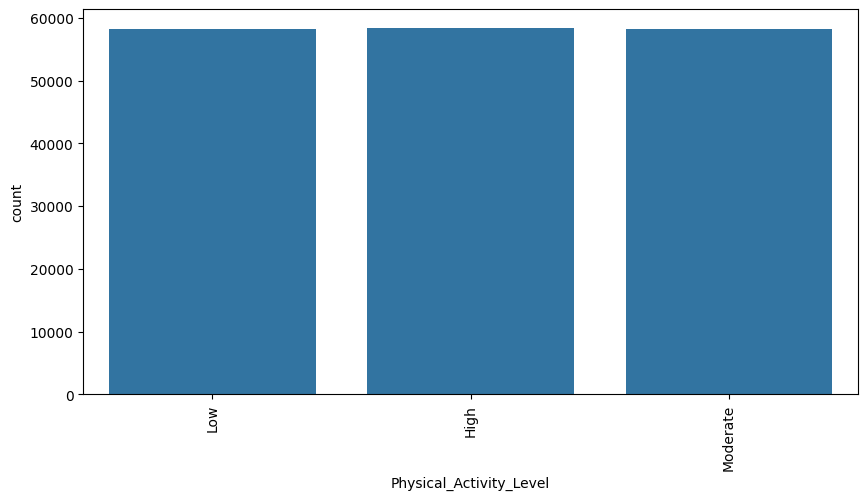

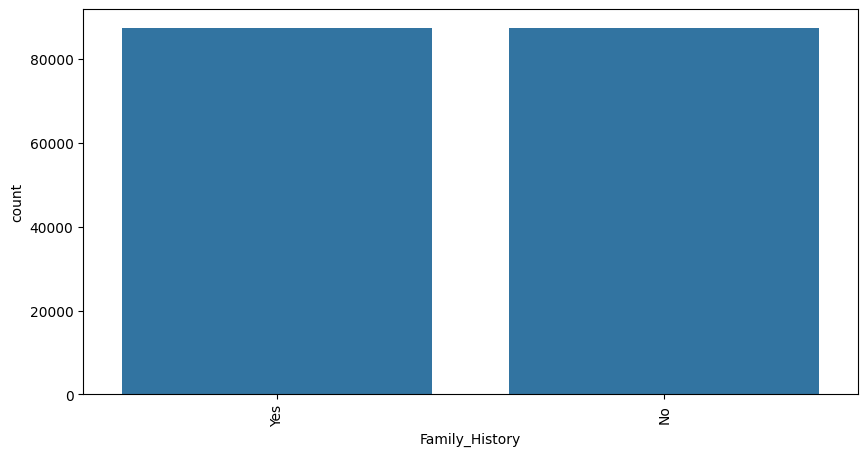

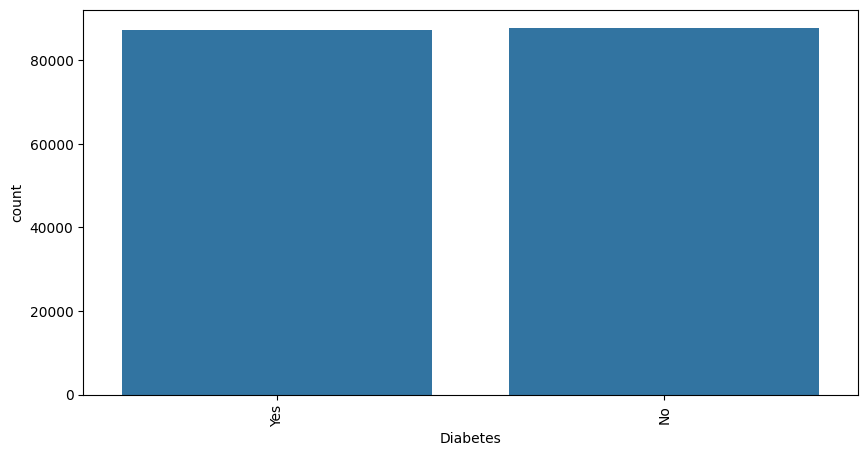

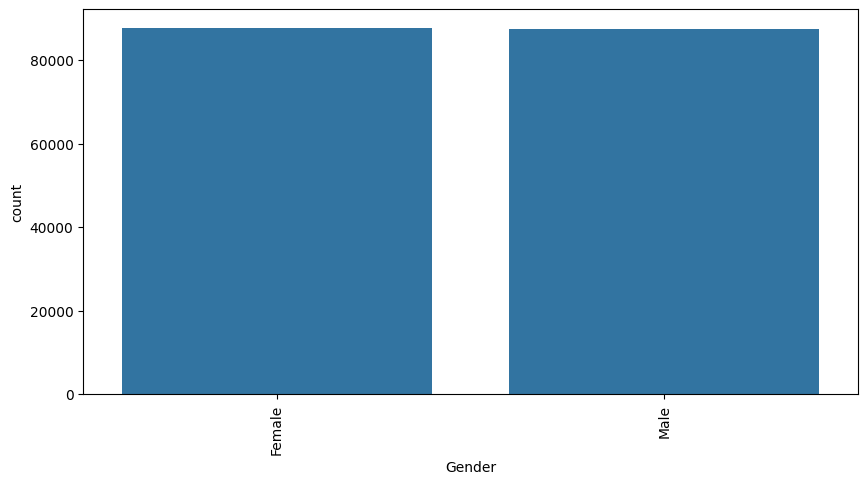

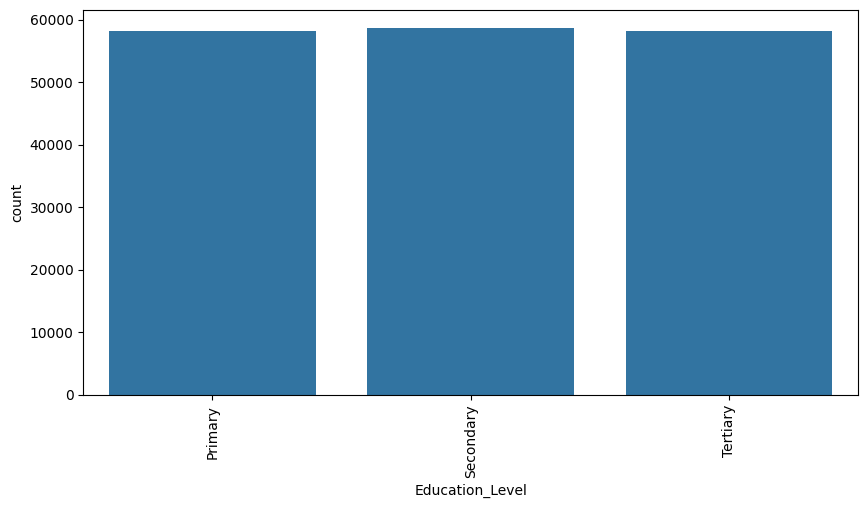

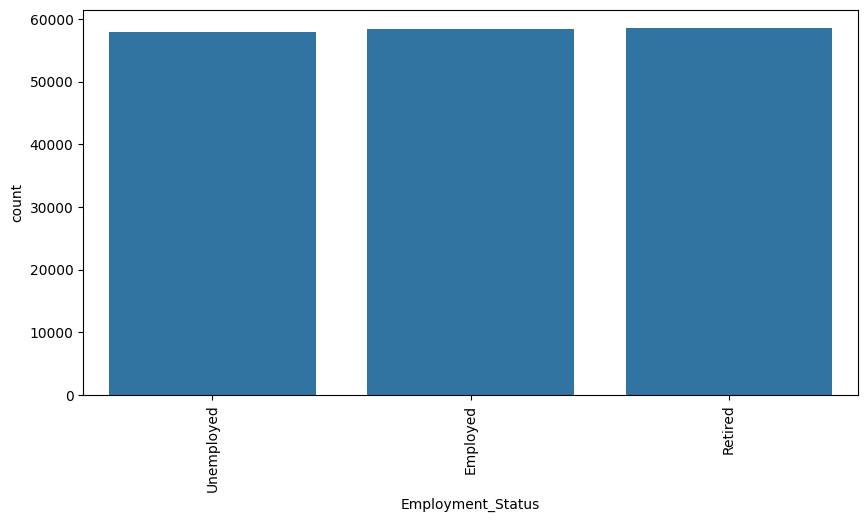

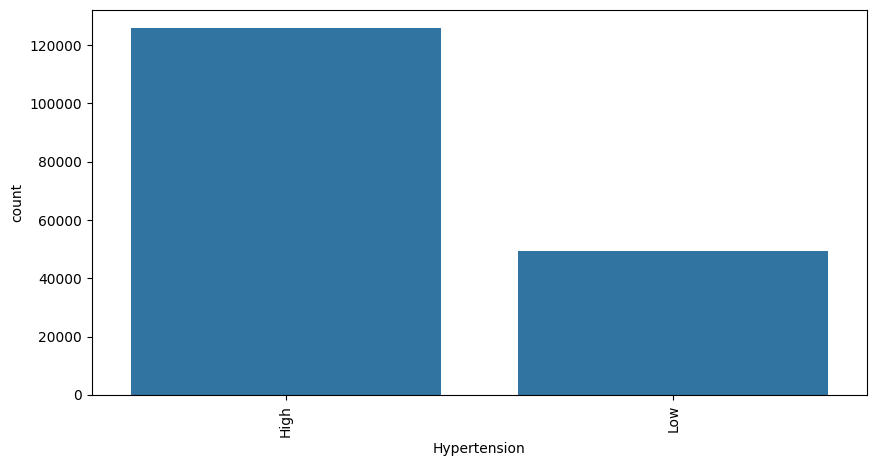

In [15]:
#Categorical column visualization
for i in cat_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x=df[i])
  plt.xticks(rotation=90)
  plt.show()

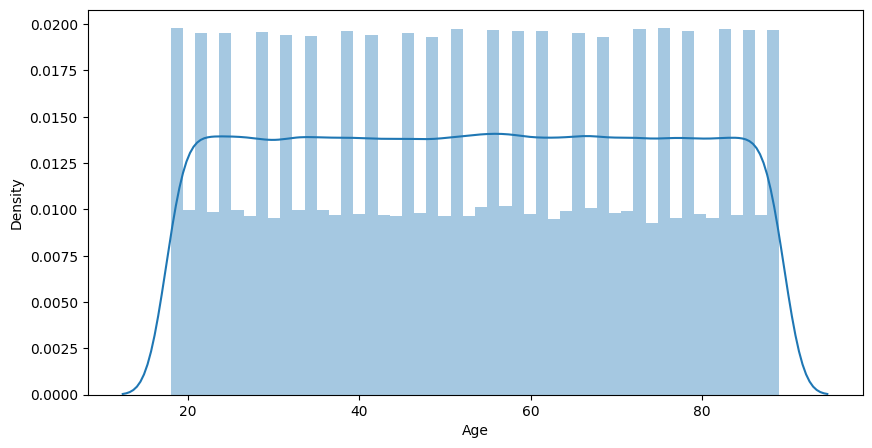

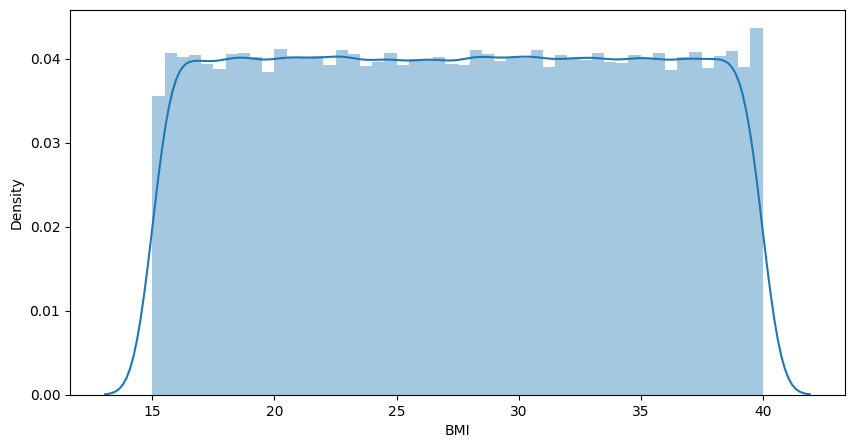

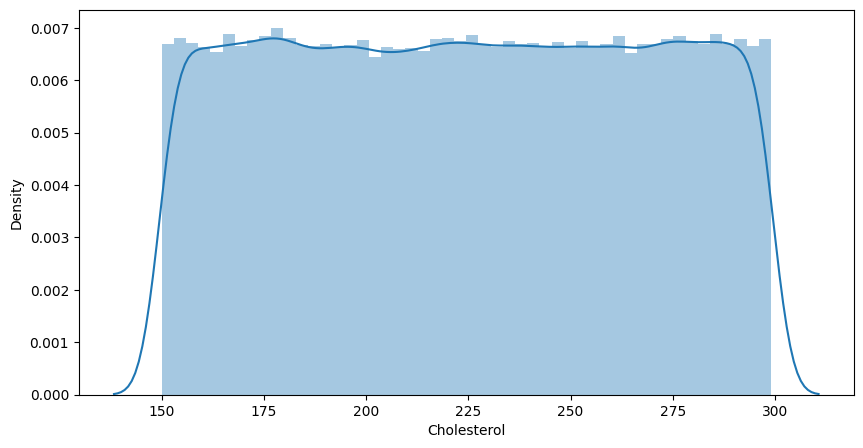

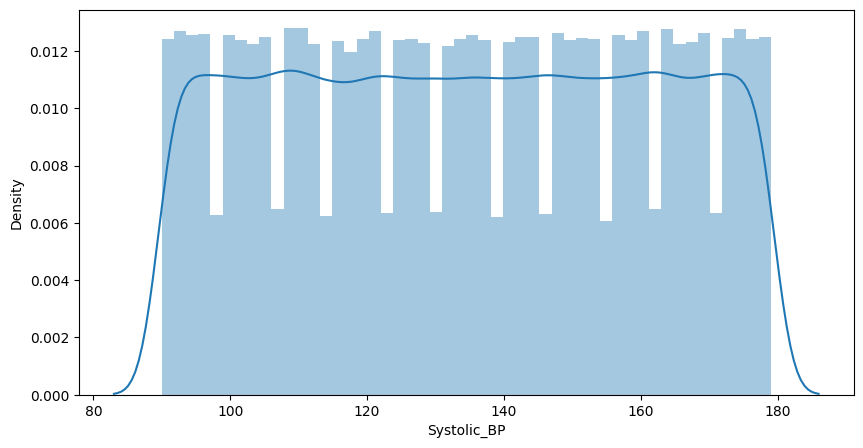

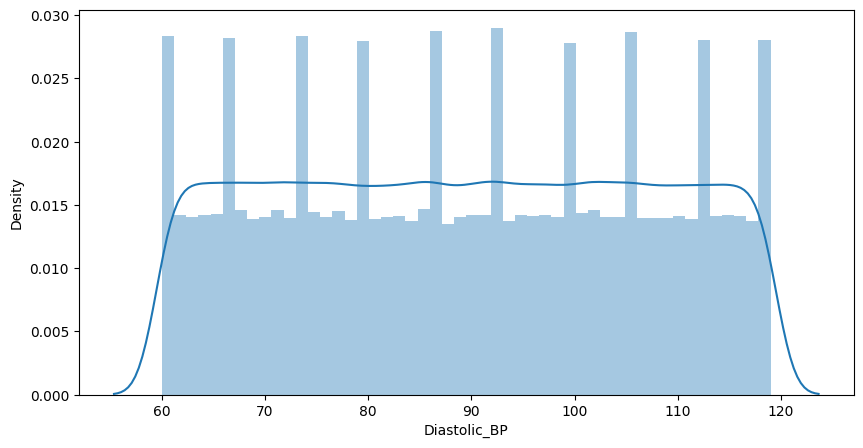

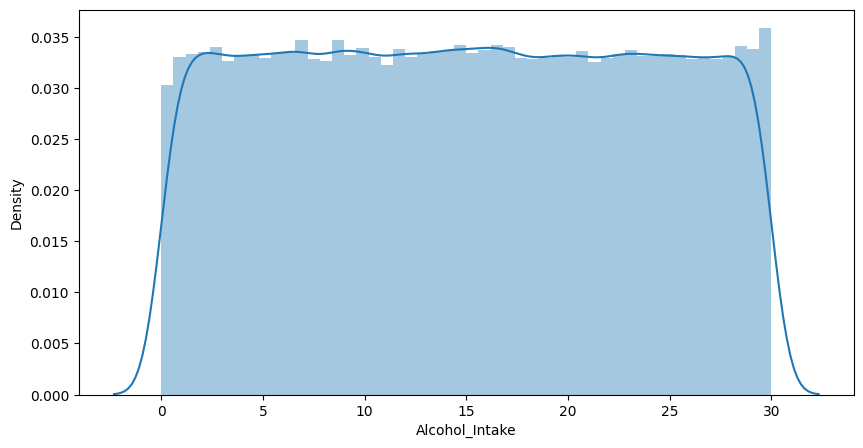

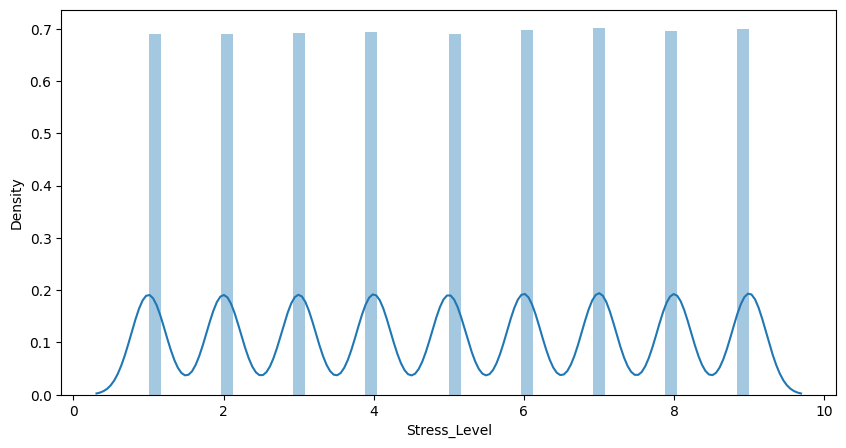

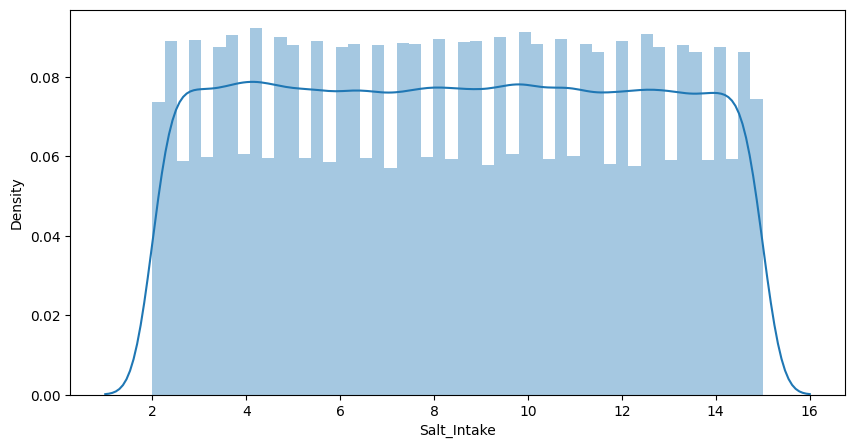

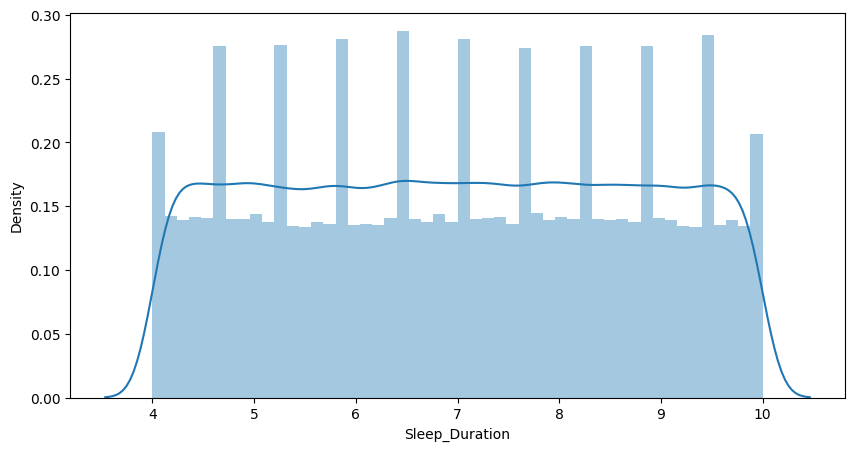

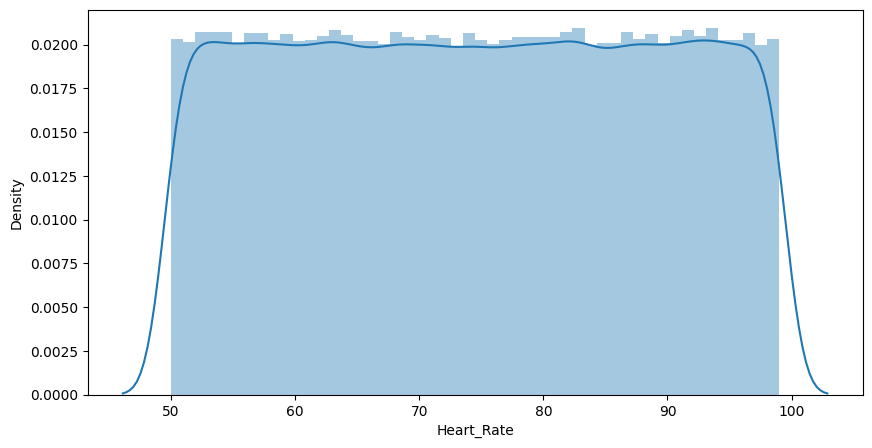

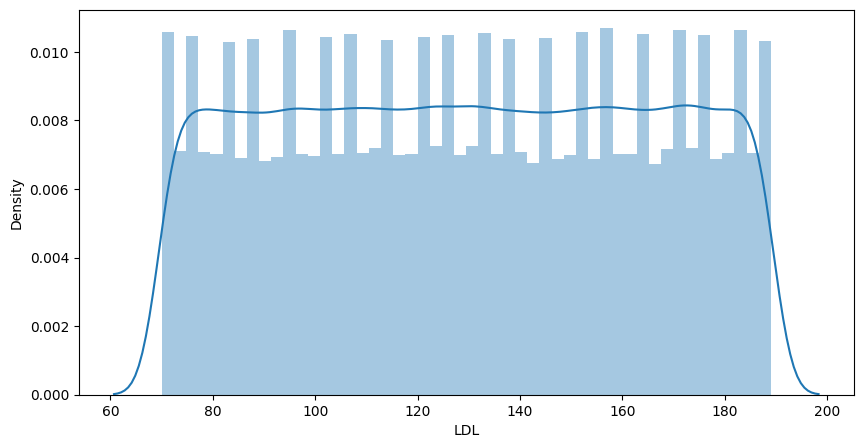

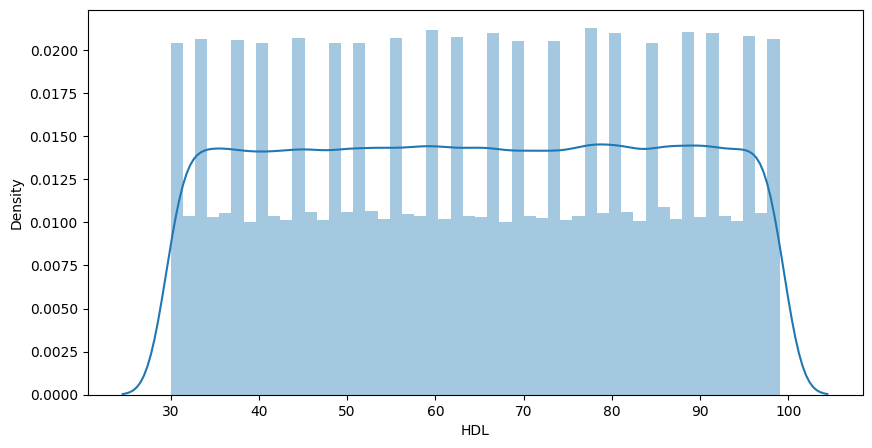

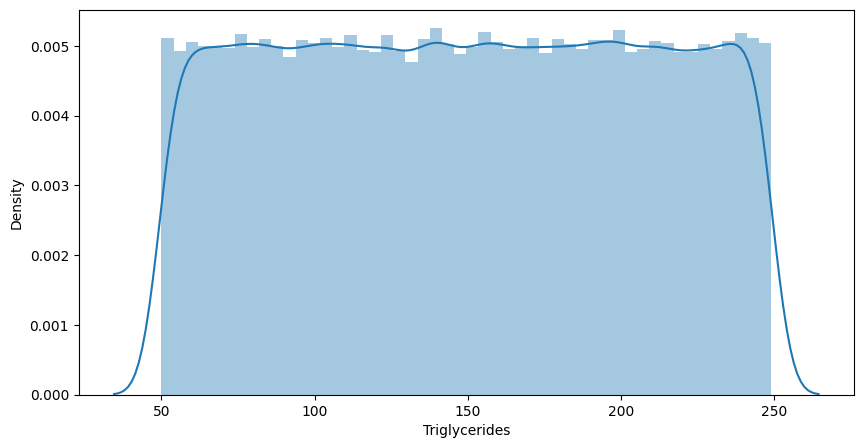

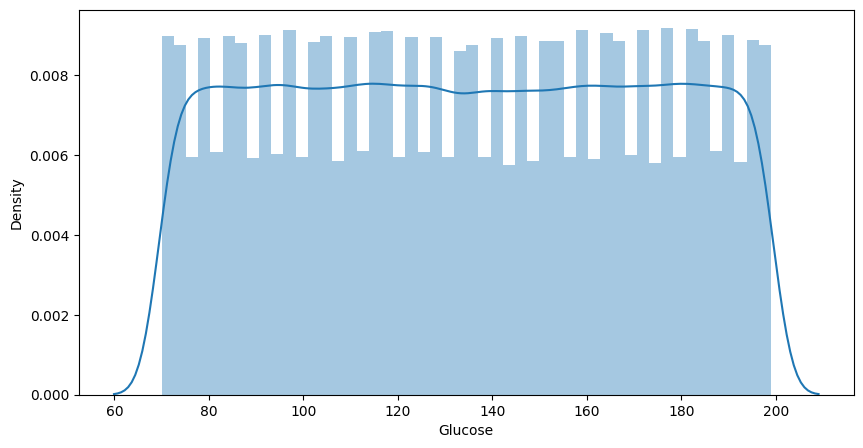

In [16]:
#numerical column distribution chart
for i in num_col:
  plt.figure(figsize=(10,5))
  sns.distplot(df[i])
  plt.show()

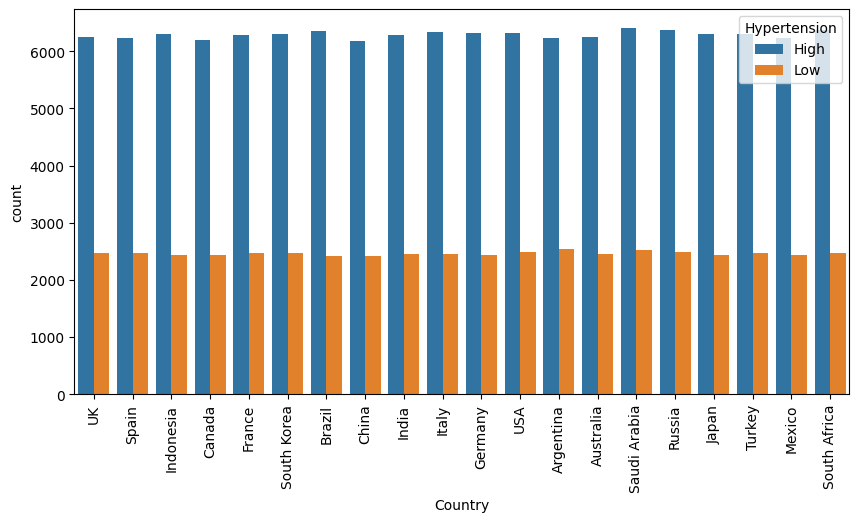

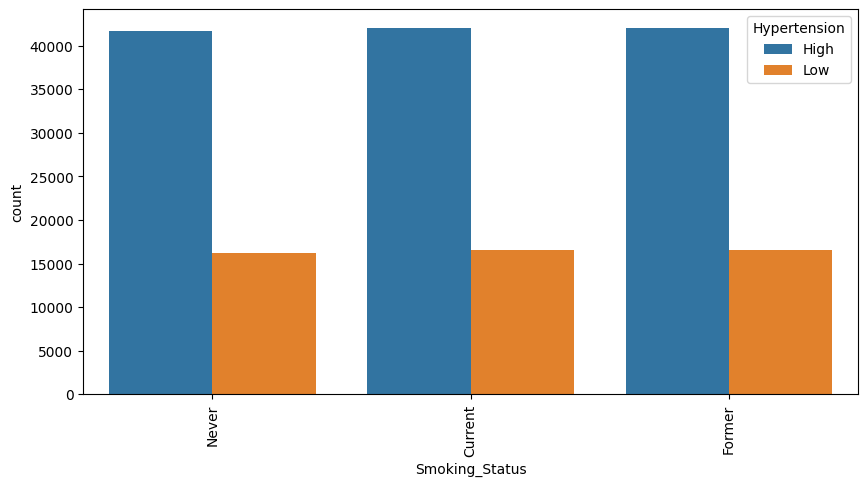

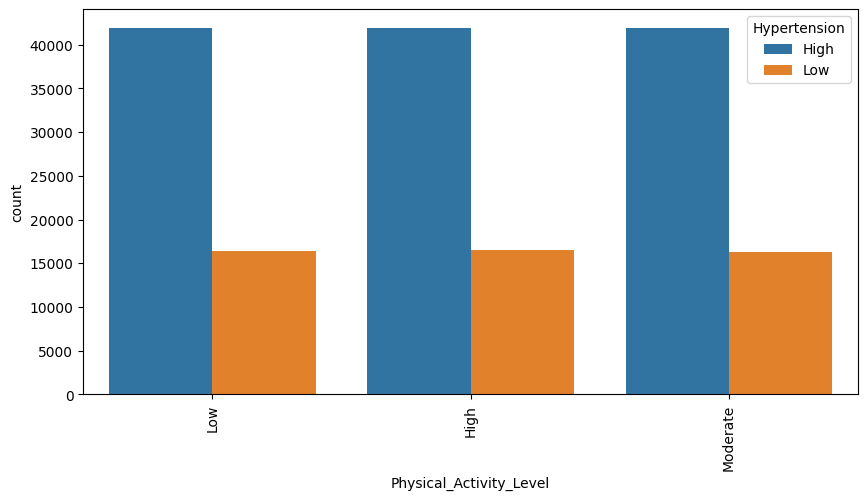

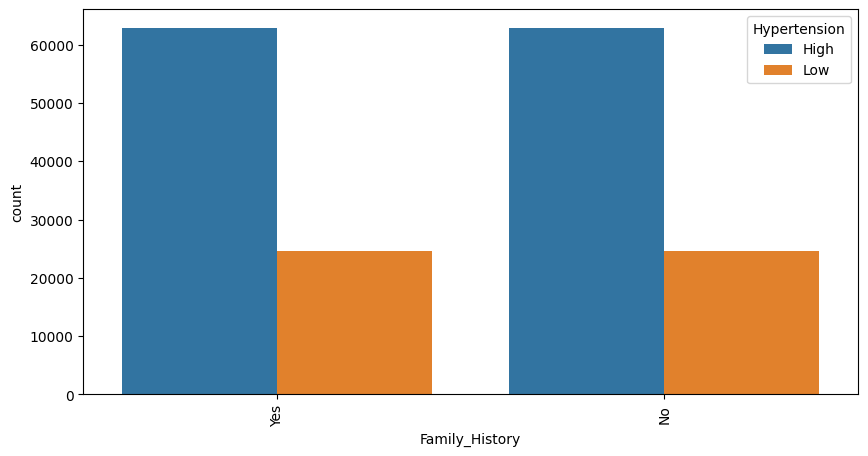

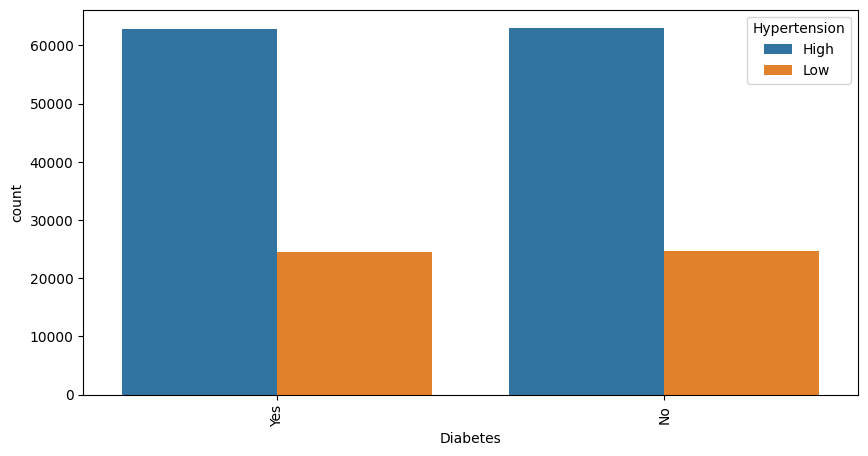

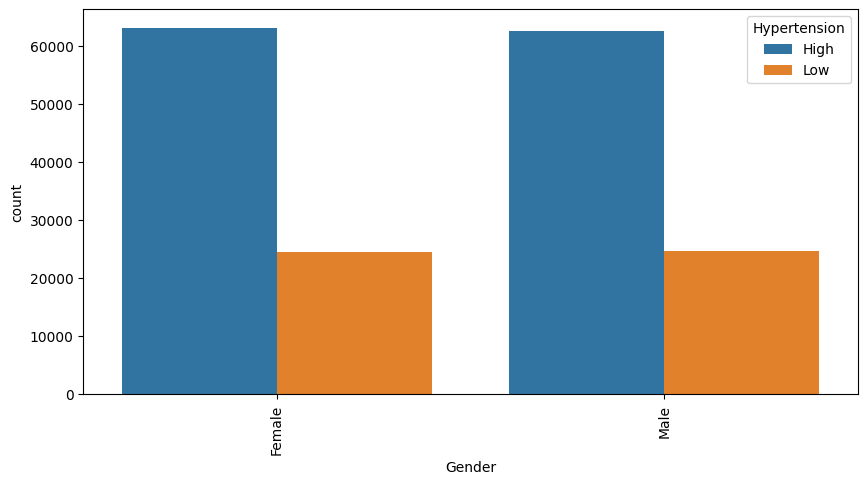

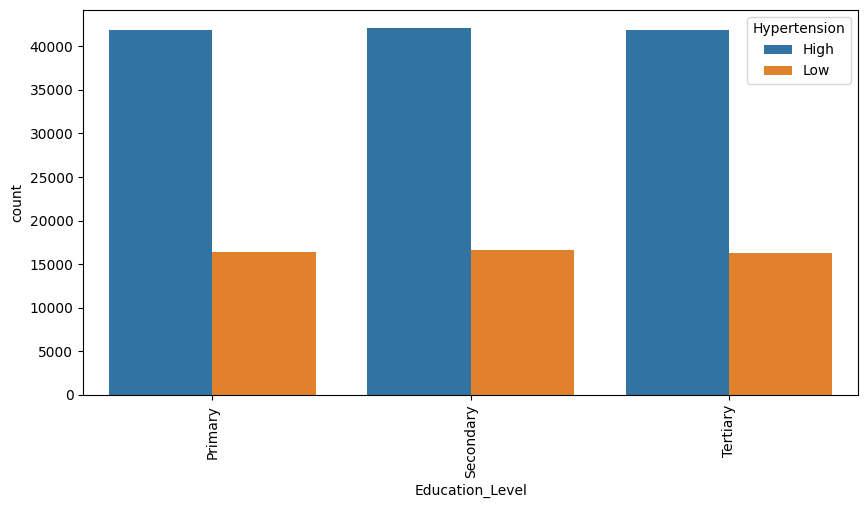

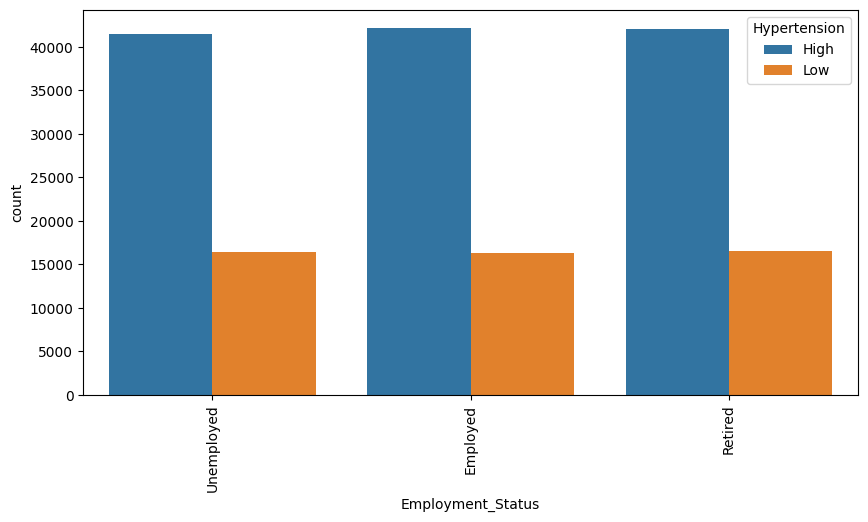

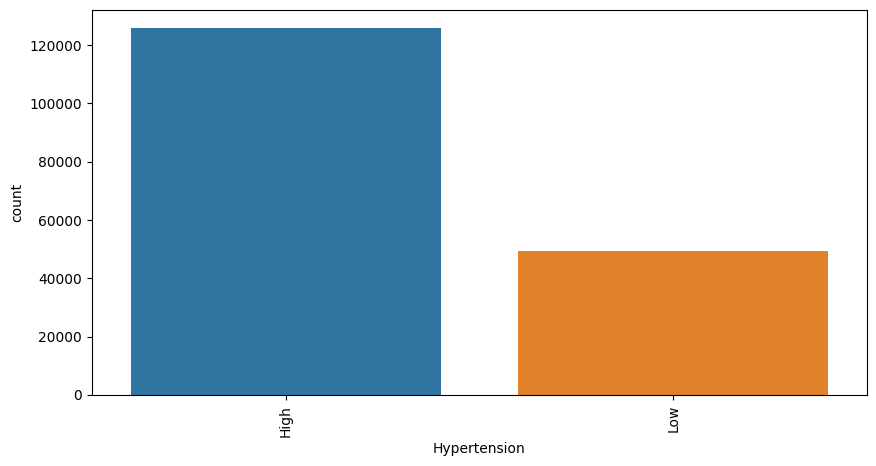

In [17]:
#categorical column compare with target column
for i in cat_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x=df[i],hue=df['Hypertension'])
  plt.xticks(rotation=90)
  plt.show()

In [45]:
#drop the country column
df.drop('Country',axis=1,inplace=True)

In [19]:
df.columns

Index(['Age', 'BMI', 'Cholesterol', 'Systolic_BP', 'Diastolic_BP',
       'Smoking_Status', 'Alcohol_Intake', 'Physical_Activity_Level',
       'Family_History', 'Diabetes', 'Stress_Level', 'Salt_Intake',
       'Sleep_Duration', 'Heart_Rate', 'LDL', 'HDL', 'Triglycerides',
       'Glucose', 'Gender', 'Education_Level', 'Employment_Status',
       'Hypertension'],
      dtype='object')

In [20]:
cate_col=df.select_dtypes(include='object').columns
cate_col

Index(['Smoking_Status', 'Physical_Activity_Level', 'Family_History',
       'Diabetes', 'Gender', 'Education_Level', 'Employment_Status',
       'Hypertension'],
      dtype='object')

In [21]:
df['Hypertension'].value_counts()

,count
Hypertension,
High,125781
Low,49201


In [46]:
#copy
df1=df.copy()

#***Encoding:-***

In [47]:
le=LabelEncoder()
encoder={}
for i in cate_col:
  df[i]=le.fit_transform(df[i])
  encoder[i]=le

#***Correlation:-***

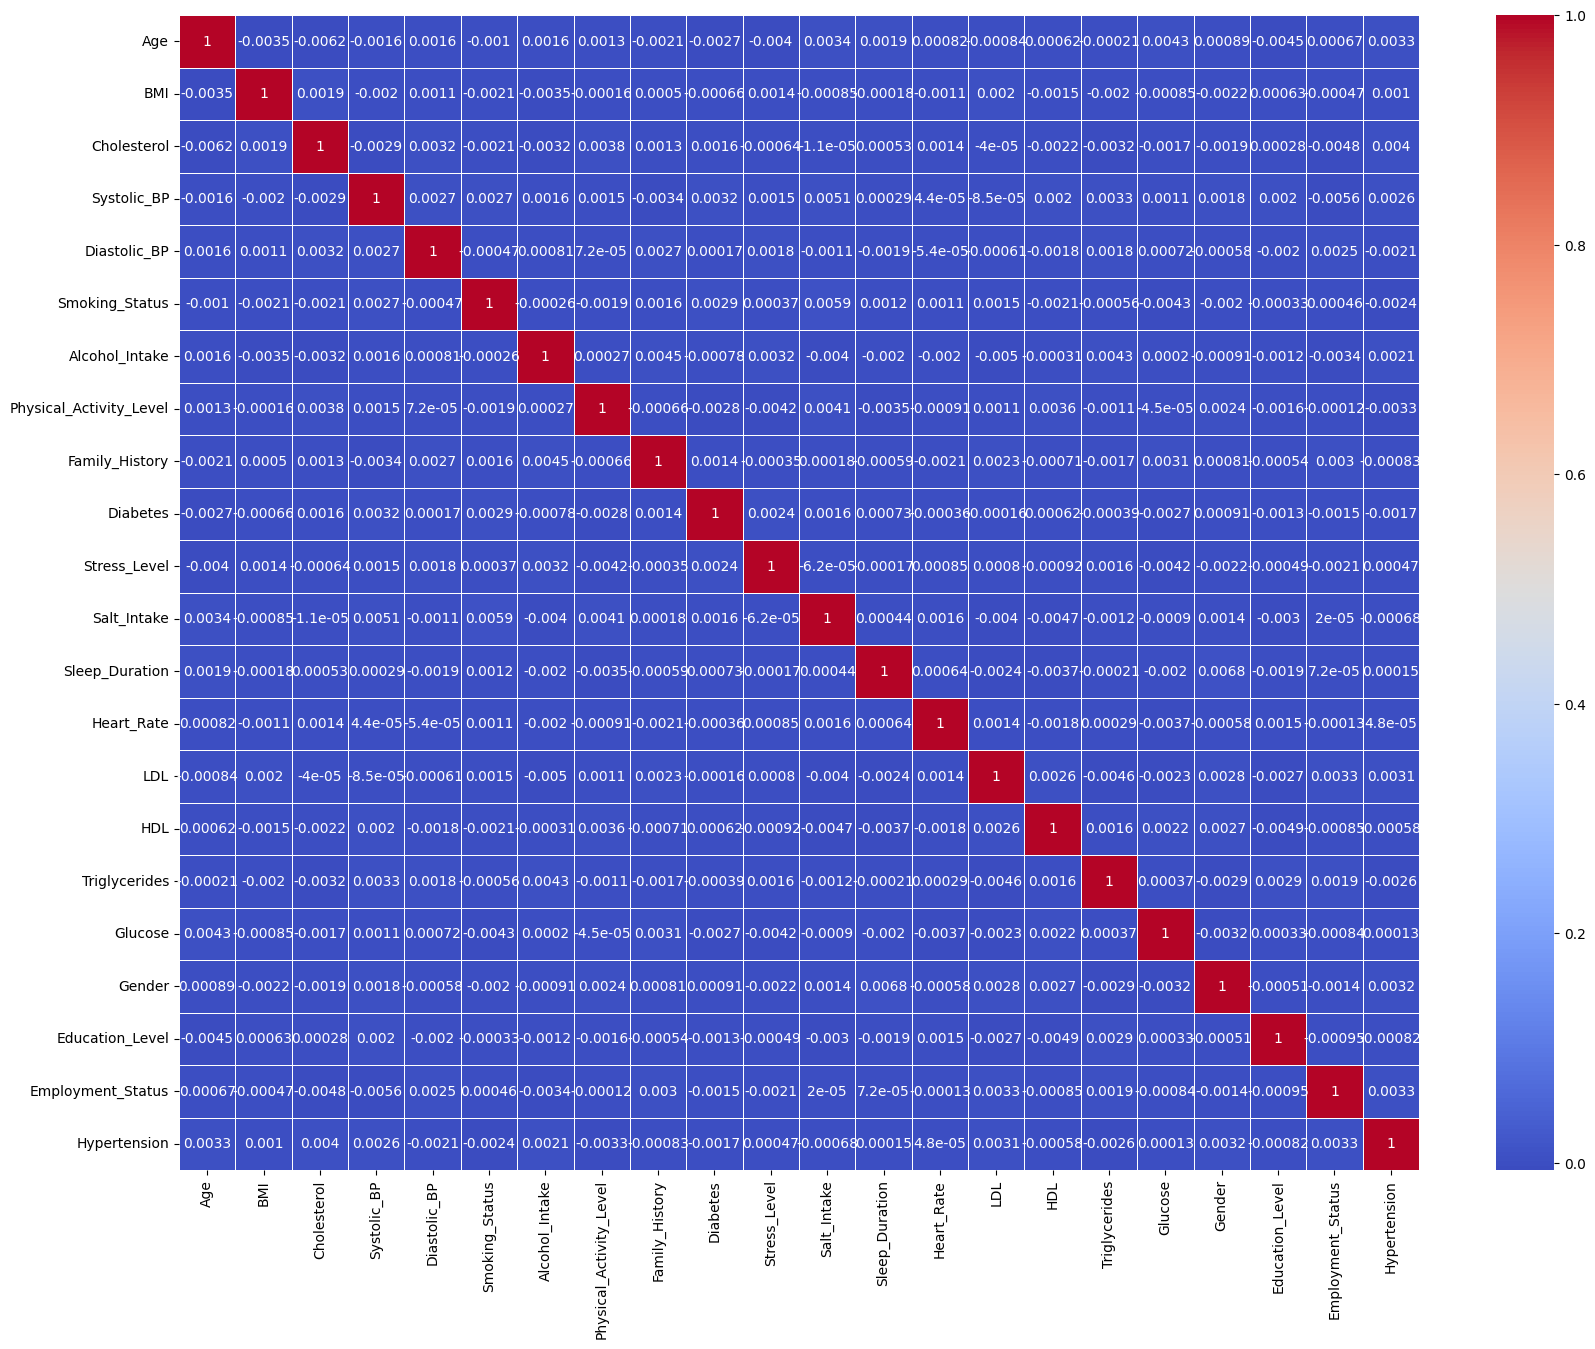

In [23]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',linewidths=0.7)
plt.show()

#***Spliting in to X,y:-***

In [48]:
X=df.drop('Hypertension',axis=1)
y=df['Hypertension']

In [49]:
y.value_counts()

,count
Hypertension,
0,125781
1,49201


In [53]:
df1['Hypertension'].value_counts()

,count
Hypertension,
High,125781
Low,49201


#***Balancing Target column:-***

In [50]:
#balacing target column
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X,y=smote.fit_resample(X,y)

In [27]:
y.value_counts()

,count
Hypertension,
0,125781
1,125781


#***Feature Selection:-***

In [28]:
rfc=RandomForestClassifier()
rfc.fit(X,y)

RandomForestClassifier()

In [29]:
# Get feature importance scores
feature_importance = pd.Series(rfc.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

print("Feature Importances:\n", feature_importance)

Feature Importances:
 Sleep_Duration             0.068514
Salt_Intake                0.068274
BMI                        0.066663
Alcohol_Intake             0.065696
Triglycerides              0.059878
Cholesterol                0.059351
Glucose                    0.059221
LDL                        0.058596
Systolic_BP                0.057681
Age                        0.056330
HDL                        0.056195
Diastolic_BP               0.055466
Heart_Rate                 0.054657
Stress_Level               0.040663
Physical_Activity_Level    0.029167
Education_Level            0.028992
Smoking_Status             0.028444
Employment_Status          0.026693
Diabetes                   0.020976
Family_History             0.020053
Gender                     0.018491
dtype: float64


In [51]:
#drop column less impotant for the model
X.drop(columns=['Gender','Family_History','Employment_Status','Physical_Activity_Level','Education_Level','Smoking_Status'],inplace=True)

In [31]:
X.shape

(251562, 15)

#***Spliting in to Train & Test:-***

In [32]:
#spliting
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [33]:
#Shape
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((201249, 15), (50313, 15), (201249,), (50313,))

#***Building Model:-***

In [34]:
model=RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [35]:
#prediction
y_pred=model.predict(X_test)

In [58]:
#Evalate the model
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7249816150895395
[[19356  5635]
 [ 8202 17120]]
              precision    recall  f1-score   support

           0       0.70      0.77      0.74     24991
           1       0.75      0.68      0.71     25322

    accuracy                           0.72     50313
   macro avg       0.73      0.73      0.72     50313
weighted avg       0.73      0.72      0.72     50313



#***Save the Model:-***

In [59]:
#save the model
joblib.dump(model,'hypertension_model.pkl')

['hypertension_model.pkl']